In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import gudhi
from pogo import Pogo
from scipy.sparse import csr_matrix
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [24]:
pogo=Pogo()


In [2]:
hf = h5py.File('Quake_Smart-seq2_Diaphragm/data.h5', 'r')

In [3]:
hf

<HDF5 file "data.h5" (mode r)>

In [4]:
hf.keys()

<KeysViewHDF5 ['exprs', 'obs', 'obs_names', 'uns', 'var', 'var_names']>

In [5]:
exprs = hf.get('exprs')
np.array(exprs)

array(['data', 'indices', 'indptr', 'shape'], dtype='<U7')

In [6]:
obs = hf.get('obs')
np.array(obs)

array(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'channel',
       'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender',
       'organ', 'organism', 'platform', 'region'], dtype='<U19')

In [7]:
y = np.array(obs.get('cluster'))

In [8]:
obs_names = hf.get('obs_names')
np.array(obs_names)

array([b'A8.D042105.3_11_M.1.1', b'K10.D042105.3_11_M.1.1',
       b'L13.D042105.3_11_M.1.1', b'M15.D042105.3_11_M.1.1',
       b'N17.D042105.3_11_M.1.1', b'O19.D042105.3_11_M.1.1',
       b'P22.D042105.3_11_M.1.1', b'A9.D042105.3_11_M.1.1',
       b'B12.D042105.3_11_M.1.1', b'C14.D042105.3_11_M.1.1',
       b'B11.D042105.3_11_M.1.1', b'D16.D042105.3_11_M.1.1',
       b'E19.D042105.3_11_M.1.1', b'C13.D042105.3_11_M.1.1',
       b'D15.D042105.3_11_M.1.1', b'E18.D042105.3_11_M.1.1',
       b'F21.D042105.3_11_M.1.1', b'H2.D042105.3_11_M.1.1',
       b'I4.D042105.3_11_M.1.1', b'J8.D042105.3_11_M.1.1',
       b'F22.D042105.3_11_M.1.1', b'A10.D042105.3_11_M.1.1',
       b'C15.D042105.3_11_M.1.1', b'D17.D042105.3_11_M.1.1',
       b'E20.D042105.3_11_M.1.1', b'G1.D042105.3_11_M.1.1',
       b'H4.D042105.3_11_M.1.1', b'I6.D042105.3_11_M.1.1',
       b'H3.D042105.3_11_M.1.1', b'J10.D042105.3_11_M.1.1',
       b'K12.D042105.3_11_M.1.1', b'L15.D042105.3_11_M.1.1',
       b'I5.D042105.3_11_M.1.1', 

In [9]:
uns = hf.get('uns')
np.array(uns)

array(['expressed_genes', 'scmap_genes', 'seurat_genes'], dtype='<U15')

In [10]:
var = hf.get('var')
np.array(var)

array([], dtype=float64)

In [11]:
var_names = hf.get('var_names')
np.array(var_names)

array([b'0610005C13Rik', b'0610007C21Rik', b'0610007L01Rik', ..., b'a',
       b'l7Rn6', b'zsGreen_transgene'], dtype='|S19')

In [12]:
data = np.array(exprs.get('data'))

In [13]:
num_rows = np.array(exprs.get('shape'))[0]
num_columns = np.array(exprs.get('shape'))[1]


In [14]:
num_rows


870

In [15]:
indices = np.array(exprs.get('indices'))

In [16]:
indptr = np.array(exprs.get('indptr'))

In [17]:
matrix = csr_matrix((data, indices, indptr), shape=(num_rows, num_columns)).toarray()

In [18]:
matrix

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 101.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  67.,   0., ...,   0.,   0.,   0.]])

In [38]:
from sklearn.decomposition import SparsePCA
transformer = SparsePCA(n_components=2, random_state=0)
transformer.fit(matrix)

SparsePCA(n_components=2, random_state=0)

In [39]:
transformer

SparsePCA(n_components=2, random_state=0)

In [40]:
matrix

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 101.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  67.,   0., ...,   0.,   0.,   0.]])

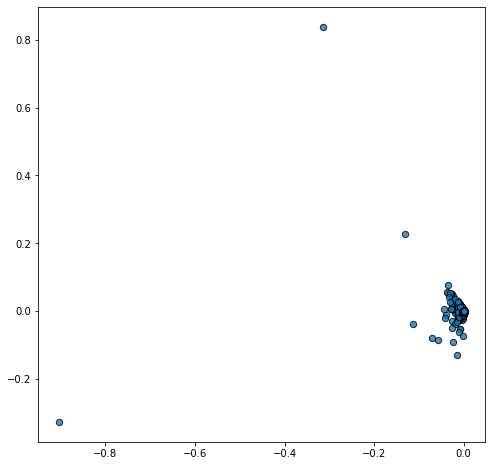

In [41]:
X=transformer.components_.T[:,0]
y=transformer.components_.T[:,1]
plt.figure(figsize=(8,8))
scatter = plt.scatter(X,y,
            s=40, 
            #c=c,
            marker="o",
            #cmap=cmap,
            norm=None,
            alpha=.8,
            edgecolor="k",
            vmin = 0)

plt.show()

In [36]:
from sklearn.decomposition import PCA
transformer = PCA(n_components=2, random_state=0)
transformer.fit(matrix)

PCA(n_components=2, random_state=0)

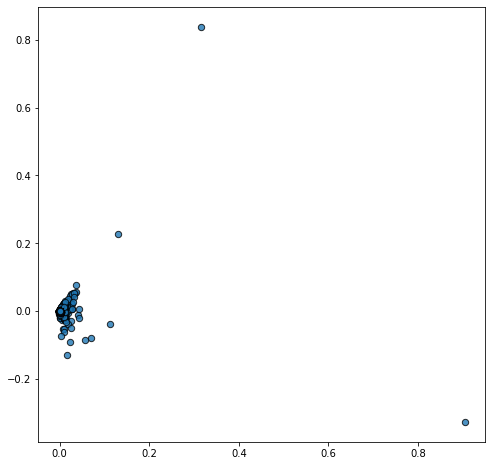

In [37]:
X=transformer.components_.T[:,0]
y=transformer.components_.T[:,1]
plt.figure(figsize=(8,8))
scatter = plt.scatter(X,y,
            s=40, 
            #c=c,
            marker="o",
            #cmap=cmap,
            norm=None,
            alpha=.8,
            edgecolor="k",
            vmin = 0)

plt.show()

In [ ]:
Y = pdist(matrix, 'euclidean')

In [ ]:
Y.shape

In [ ]:
mdist = squareform(Y, force='no', checks=True)

In [ ]:
mdist.shape

In [ ]:
mdist

In [ ]:
from scipy.spatial.distance import is_valid_dm

In [ ]:
is_valid_dm(mdist)

In [ ]:
rips_complex = gudhi.RipsComplex(points=matrix)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
diag = simplex_tree.persistence()

gudhi.plot_persistence_barcode(diag)
plt.show()

In [ ]:
persistence_module = simplex_tree.persistence()

In [ ]:
ax = gudhi.plot_persistence_diagram(persistence=persistence_module)
# We can modify the title, aspect, etc.
ax.set_title("Persistence diagram of Diaphragm Cells")
ax.set_aspect("equal")  # forces to be square shaped
plt.show()

In [ ]:
pogo = Pogo()
pogo.fit(mdist)
pogo.plot()

In [ ]:
pogo.labels_

In [ ]:
pogo.candidates_

In [ ]:
plt.plot(pogo.gap_vector_)

In [ ]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

In [ ]:
score_indices, score_array = pogo.plot_silhouette_score()

In [ ]:
pogo.plot(15000)

In [ ]:
rand_indices, rand_array = pogo.plot_rand_score(y)
